# **EDA of booming Tech-companies and predicting future stock prices**

**About the project:**
The group members of this project are: Abhishek Delwadia, Ami Dedhia, Akshata Chavan.

We identify that IT sector was one of the biggest sector by percentage in S&P 500 and the we have analyzed the companies of IT sector and their behavior from the year 2006 to 2020.The main goal of this analysis is to get information about these companies financial trends for making wise investments.For this purpose we have done EDA on the dataset which has financial information of these companies from 2006-2020 and visualized various aspects to derive a conclusion about the the top companies that should be considered for investing. Also, we have performed linear regression to predict future stock prices for a company.


### **1. Required Imports**

In [2]:
# for data analysis 
import pandas as pd
from pandas_datareader import data
import numpy as np
import random as rnd
import datetime

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
## plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

# web scraping
import requests
import bs4
import csv
import json 
import re
from io import StringIO

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

### **2. Loading the required data**

Here we have extracted the data from yahoo finance using pandas DataReader. Pandas DataReader basically allows us to read information of the stock for the period of start date and end date that we mention directly from the Internet by using the Stock Ticker of the company. We have made a list of all stock tickers for which we require the data to be fetched from Yahoo finance.

In [17]:
# setting the start date and end date
startdate = datetime.datetime(2006,1,1)
enddate = datetime.datetime(2020,11,20)


stock_List = ['AAPL','MSFT','TSM','NVDA','CRM','ADBE','INTC','ASML','CSCO','ORCL','QCOM','AVGO','ACN','TXN','SAP','SHOP','SNE',
'IBM','AMD','NOW','SQ','FIS','INTU','UBER','SNOW','FISV','AMAT','MU','INFY','LRCX','VMW','ADSK','TEAM','DELL','ADI','WDAY',
'NXPI','CTSH','ERIC','DOCU','PLTR','KLAC','APH','TEL','U','MCHP','STM','SNPS','XLNX','CRWD','SPLK','CDNS','MRVL','OKTA',
'HPQ','MSI','PANW','GLW','DDOG','FTV-PA','ANSS','WIT','RNG','FTV','PAYC','SWKS','COUP','VRSN','STNE','GRMN','MXIM','KEYS','FLT',
'NET','ANET','CAJ','ZBRA','ZS','FTNT','EPAM','CDW','GIB','TER','SSNC','ZI','UMC','WORK','BR','HUBS','QRVO','CHKP','AKAM','TYL',
'CCC','UI','ZEN','CTXS','TRMB','AVLR','STX']

d = {}
for name in stock_List:
    d[name] = data.DataReader("{}".format(name), 'yahoo', startdate, enddate)

Dataset comprises of infromation of stocks mentioned in the list above for the time period from 2006-2020.

**Date:** Date of recorded prices. 

**High:** Highest prices of a traded stock for a trading day.

**Low:** Lowest prices of a traded stock for a trading day.

**Open:** Start price of a stock after the open bell rang.

**Close:** Last price of a stock trades for a trading session.

**Volume:** Number of shares that changed hands during a given day.

**Adj Close:** The adjusted closing price factors in corporate actions, such as stock splits, dividends, and rights offerings.

In [18]:
#View the first 5 and last 5 rows of the dataset
d[name]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,20.129999,19.690001,20.100000,20.070000,8194000.0,11.385056
2006-01-04,21.120001,20.200001,20.240000,21.040001,12653000.0,11.935305
2006-01-05,21.120001,20.850000,21.010000,20.850000,9026600.0,11.827526
2006-01-06,21.450001,20.879999,21.080000,21.389999,9870500.0,12.133849
2006-01-09,22.350000,21.450001,21.520000,22.290001,9621700.0,12.644396
...,...,...,...,...,...,...
2020-11-16,56.000000,54.980000,55.000000,55.939999,3242400.0,55.939999
2020-11-17,55.889999,55.000000,55.410000,55.509998,2207000.0,55.509998
2020-11-18,56.450001,55.240002,55.669998,55.240002,2499700.0,55.240002


Every index file has the same structure as the dataset for stocks and with the same columns.

**DJI** : The Dow Jones Industrial Average, Dow Jones, or simply the Dow, is a stock market index that measures the stock performance of 30 large companies listed on stock exchanges in the United States.

**GSPC**: This Standard & Poor's Index is a capitalization-weighted index of 500 stocks. It is a popular index and is used to measure the performance of the large cap U.S. stock market. ... Money managers often index their portfolios to match or beat the S&P 500. GSPC is the ticker symbol.

**IXIC**: The NASDAQ Composite is a stock market index that includes almost all stocks listed on the Nasdaq stock market. Along with the Dow Jones Industrial Average and S&P 500 Index, it is one of the three most-followed stock market indices in the United States. IXIC is the ticker symbol.

**W5000**: The Wilshire 5000 Total Market Index is a market-capitalization-weighted index of the market value of all US-stocks actively traded in the United States. W5000 is the ticker symbol.

**XLK**: The investment seeks investment results that, before expenses, correspond generally to the price and yield performance of publicly traded equity securities of companies in the Technology Select Sector Index.

In [19]:
# Indices
DJI = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/idsproject/Indices/DJI.csv')
GSPC = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/idsproject/Indices/GSPC.csv')
IXIC = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/idsproject/Indices/IXIC.csv')
W5000 = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/idsproject/Indices/W5000.csv')
XLK = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/idsproject/Indices/XLK.csv')

# Lists
list_syp_comp = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/idsproject/List of SP 500 companies.csv')
tech_comp_list = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/idsproject/Technology Sector List.csv')


In [20]:
list_syp_comp.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ABMD,ABIOMED Inc,Health Care


Technology Sector Companies List

**Symbol**: Company's Ticker symbol.

**Name**: Company's name.

**Price**: It is the price at which a stock can be sold or purchased currently.

**Change**: Its the difference between closing prices from one day to the next.

**% Change**: Its the difference between closing prices from one day to the next in terms of percentage.

**Volume**: During a given day number of shares that changed hands is the volume of that stock.

**Avg Vol**: It is the daily average of the cumulative trading volume during the last three months.

**Market Cap (Billions)**: Is the total valuation of a company’s outstanding shares at a given moment in time.

**PE Ratio**: Is the ratio of  stock price of a company to the earnings per share of the company.

In [21]:
tech_comp_list.head()

,Symbol,Name,Price,Change,% Change,Volume,Avg Vol,Market Cap (Billions),PE Ratio
0,AAPL,Apple Inc.,113.85,-3.49,-0.0297,127959000,150549000,1936.000,34.71
1,MSFT,Microsoft Corporation,210.11,-0.28,-0.0013,25684000,31868000,1589.000,33.89
2,TSM,Taiwan Semiconductor Manufacturing Company Lim...,98.13,2.80,0.0294,8610000,8620000,451.466,44.00
3,NVDA,NVIDIA Corporation,525.60,2.09,0.0040,9034000,12642000,325.346,85.92
4,CRM,salesforce.com inc.,257.64,-0.40,-0.0016,5382000,7842000,234.452,99.44


In [22]:
DJI.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,10862.780273,10684.450195,10718.299805,10847.410156,302950000,10847.410156
1,2006-01-04,10892.639648,10833.900391,10843.969727,10880.150391,271490000,10880.150391
2,2006-01-05,10908.250000,10843.650391,10880.389648,10882.150391,250910000,10882.150391
3,2006-01-06,10968.839844,10875.450195,10875.450195,10959.309570,291740000,10959.309570
4,2006-01-09,11020.150391,10944.429688,10959.469727,11011.900391,248240000,11011.900391


In [23]:
GSPC.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,1270.219971,1245.739990,1248.290039,1268.800049,2554570000,1268.800049
1,2006-01-04,1275.369995,1267.739990,1268.800049,1273.459961,2515330000,1273.459961
2,2006-01-05,1276.910034,1270.300049,1273.459961,1273.479980,2433340000,1273.479980
3,2006-01-06,1286.089966,1273.479980,1273.479980,1285.449951,2446560000,1285.449951
4,2006-01-09,1290.780029,1284.819946,1285.449951,1290.150024,2301490000,1290.150024


In [24]:
IXIC.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,2249.679932,2189.909912,2216.530029,2243.739990,1998300000,2243.739990
1,2006-01-04,2265.280029,2246.070068,2246.959961,2263.459961,1887560000,2263.459961
2,2006-01-05,2277.560059,2264.500000,2264.929932,2276.870117,1891750000,2276.870117
3,2006-01-06,2306.719971,2281.010010,2289.209961,2305.620117,2233640000,2305.620117
4,2006-01-09,2322.629883,2303.129883,2306.179932,2318.689941,1949140000,2318.689941


In [25]:
W5000.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,12713.879883,12713.879883,12713.879883,12713.879883,0.0,12713.879883
1,2006-01-04,12773.490234,12773.490234,12773.490234,12773.490234,0.0,12773.490234
2,2006-01-05,12779.820312,12779.820312,12779.820312,12779.820312,0.0,12779.820312
3,2006-01-06,12901.690430,12901.690430,12901.690430,12901.690430,0.0,12901.690430
4,2006-01-09,12963.000000,12963.000000,12963.000000,12963.000000,0.0,12963.000000


In [26]:
XLK.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,21.350000,20.840000,21.000000,21.309999,2708300.0,17.157997
1,2006-01-04,21.559999,21.309999,21.350000,21.559999,2729600.0,17.359285
2,2006-01-05,21.690001,21.469999,21.469999,21.660000,1282200.0,17.439810
3,2006-01-06,22.020000,21.740000,21.799999,22.000000,4508700.0,17.713560
4,2006-01-09,22.090000,21.920000,22.020000,22.070000,2458300.0,17.769913


### **3. Setting the Date Column as the index**
This will help us in next step for concatinating all the stock dataframes and creating new dataframe.

In [27]:
DJI.set_index(DJI['Date'], inplace=True)
DJI.head()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2006-01-03,2006-01-03,10862.780273,10684.450195,10718.299805,10847.410156,302950000,10847.410156
2006-01-04,2006-01-04,10892.639648,10833.900391,10843.969727,10880.150391,271490000,10880.150391
2006-01-05,2006-01-05,10908.250000,10843.650391,10880.389648,10882.150391,250910000,10882.150391
2006-01-06,2006-01-06,10968.839844,10875.450195,10875.450195,10959.309570,291740000,10959.309570
2006-01-09,2006-01-09,11020.150391,10944.429688,10959.469727,11011.900391,248240000,11011.900391


In [28]:
GSPC.set_index(GSPC['Date'], inplace=True)
GSPC.head()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2006-01-03,2006-01-03,1270.219971,1245.739990,1248.290039,1268.800049,2554570000,1268.800049
2006-01-04,2006-01-04,1275.369995,1267.739990,1268.800049,1273.459961,2515330000,1273.459961
2006-01-05,2006-01-05,1276.910034,1270.300049,1273.459961,1273.479980,2433340000,1273.479980
2006-01-06,2006-01-06,1286.089966,1273.479980,1273.479980,1285.449951,2446560000,1285.449951
2006-01-09,2006-01-09,1290.780029,1284.819946,1285.449951,1290.150024,2301490000,1290.150024


In [29]:
IXIC.set_index(IXIC['Date'], inplace=True)
IXIC.head()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2006-01-03,2006-01-03,2249.679932,2189.909912,2216.530029,2243.739990,1998300000,2243.739990
2006-01-04,2006-01-04,2265.280029,2246.070068,2246.959961,2263.459961,1887560000,2263.459961
2006-01-05,2006-01-05,2277.560059,2264.500000,2264.929932,2276.870117,1891750000,2276.870117
2006-01-06,2006-01-06,2306.719971,2281.010010,2289.209961,2305.620117,2233640000,2305.620117
2006-01-09,2006-01-09,2322.629883,2303.129883,2306.179932,2318.689941,1949140000,2318.689941


In [30]:
W5000.set_index(W5000['Date'], inplace=True)
W5000.head()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2006-01-03,2006-01-03,12713.879883,12713.879883,12713.879883,12713.879883,0.0,12713.879883
2006-01-04,2006-01-04,12773.490234,12773.490234,12773.490234,12773.490234,0.0,12773.490234
2006-01-05,2006-01-05,12779.820312,12779.820312,12779.820312,12779.820312,0.0,12779.820312
2006-01-06,2006-01-06,12901.690430,12901.690430,12901.690430,12901.690430,0.0,12901.690430
2006-01-09,2006-01-09,12963.000000,12963.000000,12963.000000,12963.000000,0.0,12963.000000


In [31]:
XLK.set_index(XLK['Date'], inplace=True)
XLK.head()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2006-01-03,2006-01-03,21.350000,20.840000,21.000000,21.309999,2708300.0,17.157997
2006-01-04,2006-01-04,21.559999,21.309999,21.350000,21.559999,2729600.0,17.359285
2006-01-05,2006-01-05,21.690001,21.469999,21.469999,21.660000,1282200.0,17.439810
2006-01-06,2006-01-06,22.020000,21.740000,21.799999,22.000000,4508700.0,17.713560
2006-01-09,2006-01-09,22.090000,21.920000,22.020000,22.070000,2458300.0,17.769913


### **4. Creating new dataframe by concating all the stock dataframes**
We will create a new data frame called tech_comp_stocks by concatinating all the stock dataframes together. This will give us the ability to analyze it together and will also help us in having better control over the dataframes.

Similarly, will also create a dataframe called top_indices with GSPC, DJI, IXIC, XLK and W5000.

In [32]:
Tickr = ['AAPL','MSFT','TSM','NVDA','CRM','ADBE','INTC','ASML','CSCO','ORCL','QCOM','AVGO','ACN','TXN','SAP','SHOP','SNE',
'IBM','AMD','NOW','SQ','FIS','INTU','UBER','SNOW','FISV','AMAT','MU','INFY','LRCX','VMW','ADSK','TEAM','DELL','ADI','WDAY',
'NXPI','CTSH','ERIC','DOCU','PLTR','KLAC','APH','TEL','U','MCHP','STM','SNPS','XLNX','CRWD','SPLK','CDNS','MRVL','OKTA',
'HPQ','MSI','PANW','GLW','DDOG','FTV-PA','ANSS','WIT','RNG','FTV','PAYC','SWKS','COUP','VRSN','STNE','GRMN','MXIM','KEYS','FLT',
'NET','ANET','CAJ','ZBRA','ZS','FTNT','EPAM','CDW','GIB','TER','SSNC','ZI','UMC','WORK','BR','HUBS','QRVO','CHKP','AKAM','TYL',
'CCC','UI','ZEN','CTXS','TRMB','AVLR','STX']

Tickr2 = ['DJI','GSPC','IXIC','W5000','XLK']

# New Dataframes
tech_comp_stocks = pd.concat(d.values(), axis=1, keys=Tickr)
top_indices = pd.concat([DJI,GSPC,IXIC,W5000,XLK], axis=1, keys=Tickr2)

# Set the column name levels
tech_comp_stocks.columns.names = ['Stock Ticker','Stock Info']
top_indices.columns.names = ['Stock Ticker','Stock Info']

In [33]:
tech_comp_stocks

Stock Ticker        AAPL                                                   \
Stock Info          High         Low        Open       Close       Volume   
Date                                                                        
2006-01-03      2.669643    2.580357    2.585000    2.669643  807234400.0   
2006-01-04      2.713571    2.660714    2.683214    2.677500  619603600.0   
2006-01-05      2.675000    2.633929    2.672500    2.656429  449422400.0   
2006-01-06      2.739286    2.662500    2.687500    2.725000  704457600.0   
2006-01-09      2.757143    2.705000    2.740357    2.716071  675040800.0   
...                  ...         ...         ...         ...          ...   
2020-11-16    120.989998  118.150002  118.919998  120.300003   91183000.0   
2020-11-17    120.669998  118.959999  119.550003  119.389999   74271000.0   
2020-11-18    119.820000  118.000000  118.610001  118.029999   76322100.0   
2020-11-19    119.059998  116.809998  117.589996  118.639999   74113000.0   
2020-11-20    118.769997  117.290001  118.639999  117.339996   73391400.0   

Stock Ticker                    MSFT                                      ...  \
Stock Info     Adj Close        High         Low        Open       Close  ...   
Date                                                                      ...   
2006-01-03      2.284267   27.000000   26.100000   26.250000   26.840000  ...   
2006-01-04      2.290990   27.080000   26.770000   26.770000   26.969999  ...   
2006-01-05      2.272961   27.129999   26.910000   26.959999   26.990000  ...   
2006-01-06      2.331634   27.000000   26.490000   26.889999   26.910000  ...   
2006-01-09      2.323994   27.070000   26.760000   26.930000   26.860001  ...   
...                  ...         ...         ...         ...         ...  ...   
2020-11-16    120.300003  217.740005  214.520004  214.869995  217.229996  ...   
2020-11-17    119.389999  217.679993  214.080002  216.100006  214.460007  ...   
2020-11-18    118.029999  215.169998  210.929993  213.649994  211.080002  ...   
2020-11-19    118.639999  213.029999  209.929993  211.380005  212.419998  ...   
2020-11-20    117.339996  213.289993  210.000000  212.199997  210.389999  ...   

Stock Ticker        AVLR                                          STX  \
Stock Info          Open       Close    Volume   Adj Close       High   
Date                                                                    
2006-01-03           NaN         NaN       NaN         NaN  20.129999   
2006-01-04           NaN         NaN       NaN         NaN  21.120001   
2006-01-05           NaN         NaN       NaN         NaN  21.120001   
2006-01-06           NaN         NaN       NaN         NaN  21.450001   
2006-01-09           NaN         NaN       NaN         NaN  22.350000   
...                  ...         ...       ...         ...        ...   
2020-11-16    150.279999  151.380005  418500.0  151.380005  56.000000   
2020-11-17    152.830002  157.330002  427900.0  157.330002  55.889999   
2020-11-18    157.970001  156.779999  363600.0  156.779999  56.450001   
2020-11-19    156.080002  164.050003  647700.0  164.050003  56.080002   
2020-11-20    164.479996  168.139999  631100.0  168.139999  56.450001   

Stock Ticker                                                          
Stock Info          Low       Open      Close      Volume  Adj Close  
Date                                                                  
2006-01-03    19.690001  20.100000  20.070000   8194000.0  11.385056  
2006-01-04    20.200001  20.240000  21.040001  12653000.0  11.935305  
2006-01-05    20.850000  21.010000  20.850000   9026600.0  11.827526  
2006-01-06    20.879999  21.080000  21.389999   9870500.0  12.133849  
2006-01-09    21.450001  21.520000  22.290001   9621700.0  12.644396  
...                 ...        ...        ...         ...        ...  
2020-11-16    54.980000  55.000000  55.939999   3242400.0  55.939999  
2020-11-17    55.000000  55.410000  55.509998   22070

In [34]:
top_indices

Stock Ticker         DJI                                            \
Stock Info          Date          High           Low          Open   
2006-01-03    2006-01-03  10862.780273  10684.450195  10718.299805   
2006-01-04    2006-01-04  10892.639648  10833.900391  10843.969727   
2006-01-05    2006-01-05  10908.250000  10843.650391  10880.389648   
2006-01-06    2006-01-06  10968.839844  10875.450195  10875.450195   
2006-01-09    2006-01-09  11020.150391  10944.429688  10959.469727   
...                  ...           ...           ...           ...   
2020-11-16    2020-11-16  29964.289062  29672.359375  29672.359375   
2020-11-17    2020-11-17  29872.419922  29520.289062  29800.150391   
2020-11-18    2020-11-18  29930.849609  29432.839844  29875.400391   
2020-11-19    2020-11-19  29524.900391  29228.380859  29370.919922   
2020-11-20    2020-11-20  29469.890625  29231.199219  29437.570312   

Stock Ticker                                               GSPC               \
Stock Info           Close     Volume     Adj Close        Date         High   
2006-01-03    10847.410156  302950000  10847.410156  2006-01-03  1270.219971   
2006-01-04    10880.150391  271490000  10880.150391  2006-01-04  1275.369995   
2006-01-05    10882.150391  250910000  10882.150391  2006-01-05  1276.910034   
2006-01-06    10959.309570  291740000  10959.309570  2006-01-06  1286.089966   
2006-01-09    11011.900391  248240000  11011.900391  2006-01-09  1290.780029   
...                    ...        ...           ...         ...          ...   
2020-11-16    29950.439453  418290000  29950.439453  2020-11-16  3628.510010   
2020-11-17    29783.349609  372380000  29783.349609  2020-11-17  3623.110107   
2020-11-18    29438.419922  382850000  29438.419922  2020-11-18  3619.090088   
2020-11-19    29483.230469  331330000  29483.230469  2020-11-19  3585.219971   
2020-11-20    29263.480469  305350000  29263.480469  2020-11-20  3581.229980   

Stock Ticker               ...         W5000                              XLK  \
Stock Info            Low  ...         Close Volume     Adj Close        Date   
2006-01-03    1245.739990  ...  12713.879883    0.0  12713.879883  2006-01-03   
2006-01-04    1267.739990  ...  12773.490234    0.0  12773.490234  2006-01-04   
2006-01-05    1270.300049  ...  12779.820312    0.0  12779.820312  2006-01-05   
2006-01-06    1273.479980  ...  12901.690430    0.0  12901.690430  2006-01-06   
2006-01-09    1284.819946  ...  12963.000000    0.0  12963.000000  2006-01-09   
...                   ...  ...           ...    ...           ...         ...   
2020-11-16    3600.159912  ...  37456.898438    0.0  37456.898438  2020-11-16   
2020-11-17    3588.679932  ...  37372.378906    0.0  37372.378906  2020-11-17   
2020-11-18    3567.330078  ...  37004.921875    0.0  37004.921875  2020-11-18   
2020-11-19    3543.840088  ...  37219.050781    0.0  37219.050781  2020-11-19   
2020-11-20    3556.850098  ...  37023.179688    0.0  37023.179688  2020-11-20   

Stock Ticker                                                             \
Stock Info          High         Low        Open       Close     Volume   
2006-01-03     21.350000   20.840000   21.000000   21.309999  2708300.0   
2006-01-04     21.559999   21.309999   21.350000   21.559999  2729600.0   
2006-01-05     21.690001   21.469999   21.469999   21.660000  1282200.0   
2006-01-06     22.020000   21.740000   21.799999   22.000000  4508700.0   
2006-01-09     22.090000   21.920000   22.020000   22.070000  2458300.0   
...                  ...         ...         ...         ...        ...   
2020-11-16    122.589996  120.959999  121.209999  122.370003  7432100.0   
2020-11-17    122.349998  121.169998  121.760002  121.690002  4969700.0   
2020-11-18    122.059998  120.339996  121.480003  120.389999  4771400.0   
2020-11-19    121.580002  119.620003  120.150002  121.360001  6077600.0   
2020-11-20    121.500000  120.070000  121.470001  120.110001  4957900.0   

Stock Ticker      

### **5. Exploratory Data Analysis**
We use Exploratory data analysis in order to analyze the datasets for summarizing the important characteristics by using different visualization techniques. In our project we are using historical data of stocks in order to visualize and analyze. 

### **i. Plotting bar graph to find the Number of companies in every sector**
This bar graph helps us find out which sector is biggest based on the number of companies in each sector.

Text(0, 0.5, 'No. od Companies')

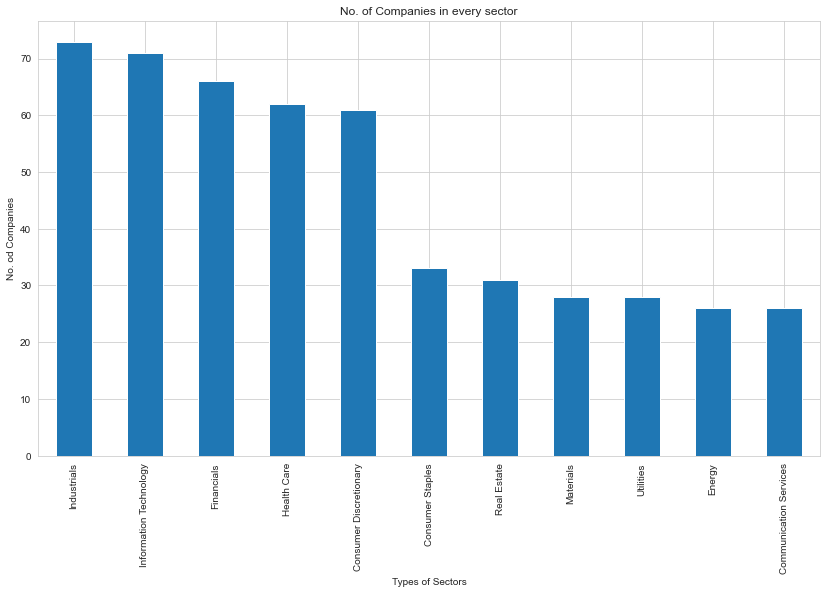

In [35]:
ax = list_syp_comp['Sector'].value_counts().plot(kind='bar', figsize=(14,8),
                                    title="No. of Companies in every sector")
ax.set_xlabel("Types of Sectors")
ax.set_ylabel("No. od Companies")


  

We find percentage share of each sector by dividing number of companies in each sector by total number of companies in all the sector. The bar graph and the percentage share of number of companies in each sector helps us find out that industrial sector is biggest followed by IT sector. Then we analyze IT sector company stocks in more depth as it is one of the biggest sectors by percentage share of number of companies in each sector.

In [37]:
#Percentage share of each sector
sectors = pd.DataFrame((list_syp_comp['Sector'].value_counts() / list_syp_comp['Sector'].count())*100)
sectors.style.background_gradient(cmap='Reds')

,Sector
Industrials,14.455446
Information Technology,14.059406
Financials,13.069307
Health Care,12.277228
Consumer Discretionary,12.079208
Consumer Staples,6.534653
Real Estate,6.138614
Materials,5.544554
Utilities,5.544554
Energy,5.148515


### **ii. Pie-chart based on Market Capitalization**

We have displayed top 10 companies by market capitalization out of top 100 companies of IT sector. 

In [39]:
# Pie Chart based on Market Capitalization
fig = go.Figure()
fig.add_trace(go.Pie(values=tech_comp_list['Market Cap (Billions)'],labels=tech_comp_list['Symbol'], hole=.28, pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=800)
fig.show()

### **iii. Bar Graph for PE Ratio per Company of top 20 IT sector companies**

**PE Ratio:** It is the ratio of stock price of a company to the earnings per share of the company. A company's stock is over-valued if its P/E ratio is high or else it can mean that investors are expecting high growth rates in the future. Since one cannot put anything in the denominator,companies that are losing money or have no earnings don't have P/E ratio.

In [40]:
# Top 20 Tech Stocks
order_PE_ratio = tech_comp_list[['Symbol', 'PE Ratio']].sort_values('PE Ratio', ascending=False).head(20)

figure = px.bar(order_PE_ratio, y=order_PE_ratio['Symbol'], x=order_PE_ratio['PE Ratio'], color='Symbol', 
                title='PE Ratio per Company of Top 20 Tech Stocks')
figure.update_layout(showlegend=False)
figure.show()

### **iv. List of Top 10 companies by the Volume in IT sector**

**Volume:** The number of shares that changed hands during a given day.

In [41]:
# Top 10 company by volume
volume_order = tech_comp_list[['Name', 'Volume']].sort_values('Volume', ascending=False).head(20)
volume_order.style.background_gradient(cmap='Blues').hide_index()

Name,Volume
Apple Inc.,127959000
Palantir Technologies Inc.,83806000
Advanced Micro Devices Inc.,46505000
Intel Corporation,30126000
Microsoft Corporation,25684000
Cisco Systems Inc.,19657000
Micron Technology Inc.,19299000
Uber Technologies Inc.,16042000
Square Inc.,12216000
QUALCOMM Incorporated,11655000


we are now creating a new empty DataFrame called returns which will contain the returns for each stock. We use pandas pct_change() on a close column to create a column representing this return value. Then we will create a for loop and for each Stock Ticker creates a returns column and set's it as a column in the returns DataFrame. Our first value will be NaN as we can't get a percentage return on first day as there will be not data in the past for its comparison.

In [42]:
#Data frame for daily return
returns = pd.DataFrame()

for tick in Tickr:
    returns[tick + ' Return'] = tech_comp_stocks[tick]['Adj Close'].pct_change()
    
for tick in Tickr2:
    returns[tick + ' Return'] = top_indices[tick]['Adj Close'].pct_change()

In [43]:
returns.head()

,AAPL Return,MSFT Return,TSM Return,NVDA Return,CRM Return,ADBE Return,INTC Return,ASML Return,CSCO Return,ORCL Return,...,ZEN Return,CTXS Return,TRMB Return,AVLR Return,STX Return,DJI Return,GSPC Return,IXIC Return,W5000 Return,XLK Return
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.002943,0.004844,0.007921,0.027996,0.050526,-0.002596,0.013296,0.016137,0.022922,0.001588,...,NaN,0.023940,0.001664,NaN,0.048331,0.003018,0.003673,0.008789,0.004689,0.011731
2006-01-05,-0.007869,0.000741,0.016700,0.022652,0.002502,-0.009110,0.013894,0.022137,0.028012,0.013471,...,NaN,0.000668,-0.003599,NaN,-0.009030,0.000184,0.000016,0.005925,0.000496,0.004639
2006-01-06,0.025813,-0.002964,0.043478,0.016426,0.105103,0.024429,0.001523,0.033428,0.022888,0.025801,...,NaN,0.005674,0.008058,NaN,0.025899,0.007090,0.009399,0.012627,0.009536,0.015697
2006-01-09,-0.003277,-0.001858,0.012037,0.027914,-0.033124,-0.015897,0.006081,0.025057,0.015451,-0.018293,...,NaN,-0.006970,0.011301,NaN,0.042076,0.004799,0.003656,0.005669,0.004752,0.003181


### **v. Visualizing MSFT stock for daily return**

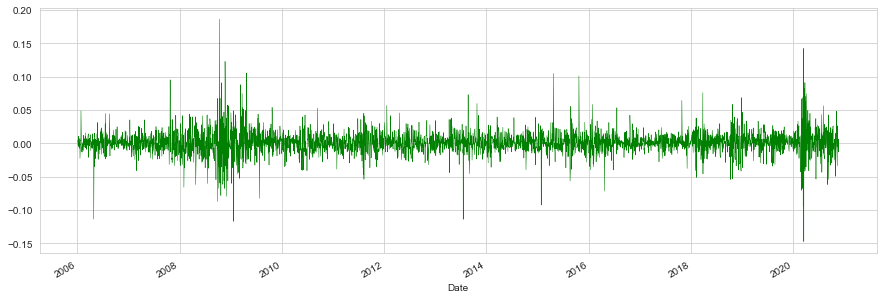

In [44]:
# Visualize MSFT stock of the new dataframe for new daily return
returns['MSFT Return'].plot(figsize=(15,5), color='Green', lw=0.5)

We are now creating an empty dataframe called monthly_returns which will contain the monthly return for each stock in the same way we created daily returns dataframe.we use dataframe.resample() function which is used for time series data. We also use dataframe.ffil() function which is used to fill the missing values in the dataframe.

In [47]:
# Data frame for monthly return
monthly_returns = pd.DataFrame()

for tick in Tickr:
    monthly_returns[tick + ' Return'] = tech_comp_stocks[tick]['Adj Close'].resample('M').ffill().pct_change()
    
#for tick in Tickr2:
#    monthly_returns[tick + ' Return'] = top_indices[tick]['Adj Close'].resample('Y').ffill().pct_change()

In [48]:
monthly_returns.head()

,AAPL Return,MSFT Return,TSM Return,NVDA Return,CRM Return,ADBE Return,INTC Return,ASML Return,CSCO Return,ORCL Return,...,CHKP Return,AKAM Return,TYL Return,CCC Return,UI Return,ZEN Return,CTXS Return,TRMB Return,AVLR Return,STX Return
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-28,-0.092968,-0.042236,-0.099074,0.048265,-0.151035,-0.029700,-0.026452,-0.084956,0.089930,-0.011933,...,-0.013915,0.211152,0.139080,NaN,NaN,NaN,0.049287,0.022239,NaN,0.021923
2006-03-31,-0.084246,0.012654,0.033915,0.214938,0.042468,-0.093385,-0.055340,-0.014990,0.070653,0.102254,...,-0.058325,0.241132,0.109990,NaN,NaN,NaN,0.171199,0.101198,NaN,-0.009033
2006-04-30,0.122289,-0.112459,0.041750,0.020608,-0.035233,0.121602,0.026721,0.037801,-0.033226,0.065742,...,-0.032468,0.024323,0.002727,NaN,NaN,NaN,0.053298,0.051720,NaN,0.008736
2006-05-31,-0.150874,-0.058455,-0.096374,-0.213552,-0.158060,-0.269643,-0.093471,-0.037843,-0.060620,-0.025360,...,-0.003614,-0.071238,-0.036265,NaN,NaN,NaN,-0.058617,-0.030393,NaN,-0.118221


### **vi. Visualizing AAPL stock for monthly return**

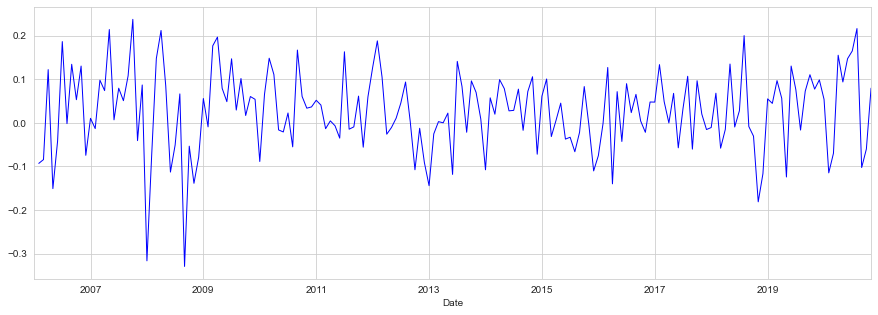

In [49]:
#line chart of AAPL stock for monthly returns
monthly_returns['AAPL Return'].plot(figsize=(15,5), color='Blue', lw=1)

We are now creating an empty dataframe called yearly_returns which will contain the yearly return for each stock in the same way we created monthly_returns dataframe.

In [50]:
#Data frame for yearly return
yearly_returns = pd.DataFrame()

for tick in Tickr:
    yearly_returns[tick + ' Return'] = tech_comp_stocks[tick]['Adj Close'].resample('Y').ffill().pct_change()
    
#for tick in Tickr2:
#    yearly_returns[tick + ' Return'] = top_indices[tick]['Adj Close'].resample('Y').ffill().pct_change()

In [52]:
yearly_returns.head()

,AAPL Return,MSFT Return,TSM Return,NVDA Return,CRM Return,ADBE Return,INTC Return,ASML Return,CSCO Return,ORCL Return,...,CHKP Return,AKAM Return,TYL Return,CCC Return,UI Return,ZEN Return,CTXS Return,TRMB Return,AVLR Return,STX Return
Date,,,,,,,,,,,,,,,,,,,,,
2006-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,1.334748,0.208429,-0.049057,0.378817,0.719890,0.039154,0.342319,0.223219,-0.009513,0.317386,...,0.001825,-0.348645,-0.083215,NaN,NaN,NaN,0.405176,0.192194,NaN,-0.021977
2008-12-31,-0.569113,-0.443856,-0.164318,-0.762787,-0.489392,-0.501755,-0.435123,-0.414211,-0.397857,-0.214792,...,-0.135246,-0.563873,-0.070597,NaN,NaN,NaN,-0.379900,-0.285384,NaN,-0.820046
2009-12-31,1.469010,0.604672,0.526093,1.314747,1.304592,0.727571,0.439030,0.916219,0.468712,0.393870,...,0.784097,0.679258,0.661937,NaN,NaN,NaN,0.765379,0.166127,NaN,3.138511
2010-12-31,0.530679,-0.065246,0.150723,-0.175589,0.789345,-0.163132,0.062695,0.133804,-0.154971,0.286125,...,0.365407,0.856748,0.042692,NaN,NaN,NaN,0.644076,0.584524,NaN,-0.173722


### **vii. Visualizing TSM stock for yearly return**

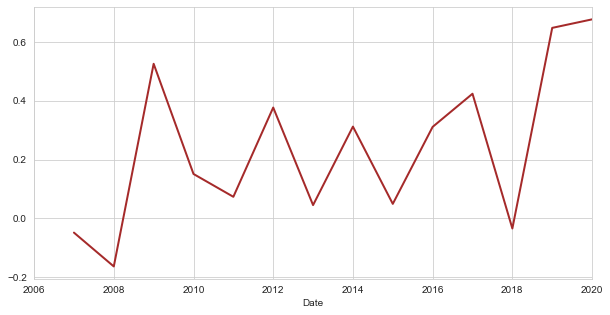

In [51]:
#line chart of TSM stock for yearly returns
yearly_returns['TSM Return'].plot(figsize=(10,5), color='brown', lw=2)

### **viii. Visualizing Monthly, Yearly cumulative returns**
In order to calculate the cumulative returns we are using the cumprod() function.cumprod() function returns a dataframe or series of the same size containing the cumulative product.

In [53]:
# Monthly Cumulative Returns
monthly_cumulative_returns = pd.DataFrame()

for tick in Tickr:
    monthly_cumulative_returns[tick + ' Return'] = (monthly_returns[tick + ' Return'] + 1).cumprod()
monthly_cumulative_returns.head()    

,AAPL Return,MSFT Return,TSM Return,NVDA Return,CRM Return,ADBE Return,INTC Return,ASML Return,CSCO Return,ORCL Return,...,CHKP Return,AKAM Return,TYL Return,CCC Return,UI Return,ZEN Return,CTXS Return,TRMB Return,AVLR Return,STX Return
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-28,0.907032,0.957764,0.900926,1.048265,0.848965,0.970300,0.973548,0.915044,1.089930,0.988067,...,0.986085,1.211152,1.139080,NaN,NaN,NaN,1.049287,1.022239,NaN,1.021923
2006-03-31,0.830618,0.969883,0.931481,1.273577,0.885018,0.879688,0.919672,0.901327,1.166937,1.089101,...,0.928571,1.503199,1.264368,NaN,NaN,NaN,1.228923,1.125687,NaN,1.012692
2006-04-30,0.932194,0.860812,0.970371,1.299822,0.853837,0.986660,0.944247,0.935398,1.128164,1.160700,...,0.898423,1.539762,1.267816,NaN,NaN,NaN,1.294423,1.183908,NaN,1.021539
2006-05-31,0.791551,0.810493,0.876852,1.022242,0.718879,0.720614,0.855988,0.900000,1.059774,1.131265,...,0.895176,1.430073,1.221839,NaN,NaN,NaN,1.218547,1.147926,NaN,0.900771


In [54]:
# yearly cumulative returns
yearly_cumulative_returns = pd.DataFrame()

for tick in Tickr:
    yearly_cumulative_returns[tick + ' Return'] = (yearly_returns[tick + ' Return'] + 1).cumprod()
yearly_cumulative_returns.head()

,AAPL Return,MSFT Return,TSM Return,NVDA Return,CRM Return,ADBE Return,INTC Return,ASML Return,CSCO Return,ORCL Return,...,CHKP Return,AKAM Return,TYL Return,CCC Return,UI Return,ZEN Return,CTXS Return,TRMB Return,AVLR Return,STX Return
Date,,,,,,,,,,,,,,,,,,,,,
2006-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,2.334748,1.208429,0.950943,1.378817,1.719890,1.039154,1.342319,1.223219,0.990487,1.317386,...,1.001825,0.651355,0.916785,NaN,NaN,NaN,1.405176,1.192194,NaN,0.978023
2008-12-31,1.006011,0.672060,0.794686,0.327074,0.878189,0.517753,0.758245,0.716549,0.596414,1.034422,...,0.866332,0.284074,0.852063,NaN,NaN,NaN,0.871349,0.851961,NaN,0.175999
2009-12-31,2.483852,1.078436,1.212765,0.757093,2.023868,0.894455,1.091137,1.373064,0.875961,1.441850,...,1.545620,0.477033,1.416074,NaN,NaN,NaN,1.538262,0.993495,NaN,0.728375
2010-12-31,3.801980,1.008072,1.395557,0.624156,3.621399,0.748541,1.159547,1.556785,0.740212,1.854400,...,2.110401,0.885730,1.476529,NaN,NaN,NaN,2.529020,1.574216,NaN,0.601840


### **ix. Visualizing Best and Worst Yearly cumulative returns  of IT sector companies**


In [68]:
# 20 best yearly cumulative returns barchart
best_yearly_cum = yearly_cumulative_returns.loc['2006-01-01' : '2019-12-31'].std().sort_values(ascending=False).head(20)
figure = px.bar(best_yearly_cum, title='Top 20 Best Yearly Cumulative Returns from 2006-2020', 
                labels={'value':'Yearly Cumulative Return', 'index':'Stocks'})
color_discrete_sequence =['green']
figure.update_layout(showlegend=False)
figure.show()


In [70]:
# 20 worst yearly cumulative returns barchart 
best_yearly_cum = yearly_cumulative_returns.loc['2006-01-01' : '2019-12-31'].std().sort_values(ascending=True).head(20)
figure = px.bar(best_yearly_cum, title='Top 20 Worst Yearly Cumulative Returns from 2006-2020', 
                labels={'value':'Yearly Cumulative Returns', 'index':'Stocks'})
figure.update_layout(showlegend=False)
figure.show()

### **x. Visualizing Top 5 risky stocks based on daily and yearly returns std. deviation**

Standard deviation is used as a statistical measure of market volatility, its used in measuring how widely prices are dispersed from the average price.The standard deviation will return a low value for a stock If prices trade in a narrow trading range which indicates low volatility.Also, if prices of a stock fluctuate wildly up and down, then standard deviation returns a high value that indicates high volatility of stock.

Text(0.5, 1.0, 'Daily Stocks Standard Deviation')

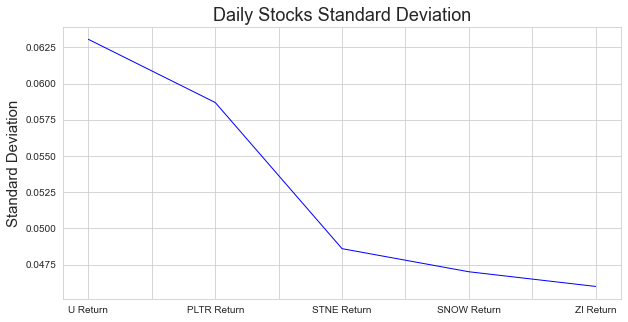

In [61]:
# Top 5 risky stocks based on daily returns standard deviation
returns.std().sort_values(ascending=False).head().plot(figsize=(10,5), color='Blue', lw=1.0)
plt.ylabel('Standard Deviation', fontsize=15)
plt.title('Daily Stocks Standard Deviation', fontsize=18)


Text(0.5, 1.0, 'Yearly Stocks Standard Deviation')

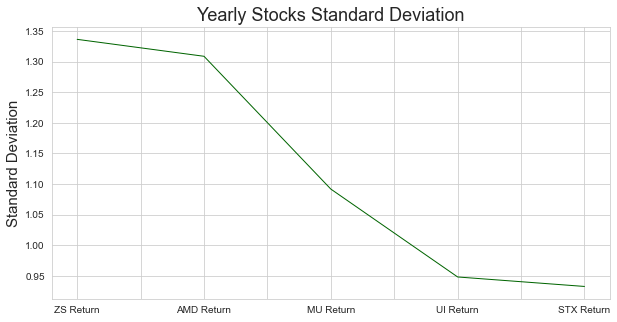

In [62]:
# top 5 risky stocks based on yearly returns standard deviation
yearly_returns.std().sort_values(ascending=False).head().plot(figsize=(10,5), color='darkgreen', lw=1.0)
plt.ylabel('Standard Deviation', fontsize=15)
plt.title('Yearly Stocks Standard Deviation', fontsize=18)


### **xi. Visualizing 20 most volatile stocks 2006-2020**

In [63]:
#Bar chart for 20 most volatile stocks
returns_until2020 = returns.loc['2006-01-01':'2020-12-31'].std().head(20).sort_values(ascending=False)
figure = px.bar(returns_until2020, title='Most Volatile Stocks 2006-2020', 
                labels={'value':'Standard Deviation', 'index':'Stocks'})
figure.update_layout(showlegend=False)
figure.show()

### **xii. Distplot for 4 most volatile stocks 2006-2020**
We have created a displot for 4 most volatile stocks from 2006 to 2020 so we get a cumulative view of returns given by the stock along with standard deviation to show the volatility of the stock over the years.

[Text(0, 0.5, 'Returns'),
 Text(0.5, 0, 'Standard Deviation'),
 Text(0.5, 1.0, 'Salesforce')]

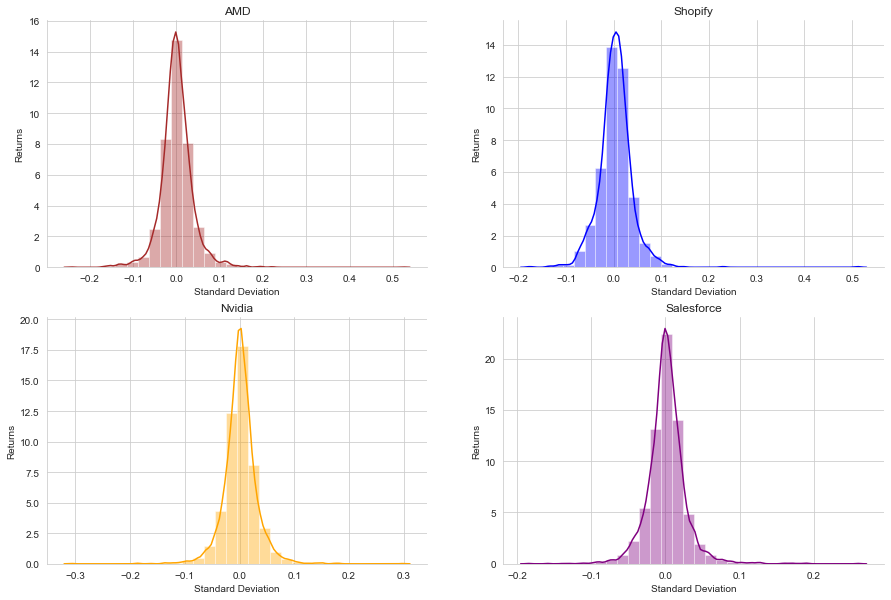

In [64]:
fig, axes = plt.subplots(2, 2,figsize=(15,10))
sns.distplot(returns.loc['2006-01-01':'2020-12-31']['AMD Return'], color='brown', bins=30, ax=axes[0,0])
sns.distplot(returns.loc['2006-01-01':'2020-12-31']['SHOP Return'], color='blue', bins=30, ax=axes[0,1])
sns.distplot(returns.loc['2006-01-01':'2020-12-31']['NVDA Return'], color='orange', bins=30, ax=axes[1,0])
sns.distplot(returns.loc['2006-01-01':'2020-12-31']['CRM Return'], color='purple', bins=30, ax=axes[1,1])
sns.despine()
axes[0,0].set(xlabel='Standard Deviation', ylabel='Returns', title='AMD')
axes[0,1].set(xlabel='Standard Deviation', ylabel='Returns', title='Shopify')
axes[1,0].set(xlabel='Standard Deviation', ylabel='Returns', title='Nvidia')
axes[1,1].set(xlabel='Standard Deviation', ylabel='Returns', title='Salesforce')

So Exploratory data analysis helps us find out which sector is biggest. Then upon in depth analysis of IT sector companies we found which stocks offer best and worst returns, also we found out which stocks are most volatile and which are least. All these characteristics are important while analyzing the financial trends of companies for making wise investments.

## **6. Linear Regression to predict the future stock prices**

In [ ]:
# Linear regression is used to predict the value of a variable based on the value of another variable.
# We will be using svm (support vector regressor model) and linear regression and 
# we will find coefficient of determination R^2 to determine how well the model fits the data
# This prediction will help the customers to get a better idea in which stocks they should invest

### **i. Predicting stock prices for Apple**

In [55]:
# Stock data of apple
df1 = pd.read_csv('C:/Users/chava/Downloads/Technology Companies/AAPL.csv')

In [56]:
# Sample data
df1.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,2.669643,2.580357,2.585000,2.669643,807234400.0,2.284267
1,2006-01-04,2.713571,2.660714,2.683214,2.677500,619603600.0,2.290990
2,2006-01-05,2.675000,2.633929,2.672500,2.656429,449422400.0,2.272961
3,2006-01-06,2.739286,2.662500,2.687500,2.725000,704457600.0,2.331634
4,2006-01-09,2.757143,2.705000,2.740357,2.716071,675040800.0,2.323994


In [99]:
#df_date = df1['Date']

df_date['Date'] = pd.DatetimeIndex(df_date.Date).Date

AttributeError: 'Series' object has no attribute 'Date'

In [83]:
df_date.head()

0    2006-01-03
1    2006-01-04
2    2006-01-05
3    2006-01-06
4    2006-01-09
Name: Date, dtype: object

In [57]:
# Get the Adjusted Close Price
# Here the adjusted close price will be the independent variable
df = df1[['Adj Close']]

In [58]:
df1.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
3744,2020-11-16,120.989998,118.150002,118.919998,120.300003,91183000.0,120.300003
3745,2020-11-17,120.669998,118.959999,119.550003,119.389999,74271000.0,119.389999
3746,2020-11-18,119.820000,118.000000,118.610001,118.029999,76322100.0,118.029999
3747,2020-11-19,119.059998,116.809998,117.589996,118.639999,74113000.0,118.639999
3748,2020-11-20,118.769997,117.290001,118.639999,117.339996,73391400.0,117.339996


In [59]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days

In [60]:
#Create another column (the target ) shifted 'n' units up
# A new column 'Prediction will be created' which will be the target or the dependent variable
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)

In [70]:
# New dataset
df.head()

,Adj Close,Prediction
0,2.284267,2.115278
1,2.290990,2.156532
2,2.272961,2.147975
3,2.331634,2.110999
4,2.323994,2.179450


In [62]:
X = np.array(df.drop(['Prediction'],1))

In [63]:
#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[  2.28426695]
 [  2.29098988]
 [  2.27296114]
 ...
 [114.88180542]
 [114.77198792]
 [116.76854706]]


In [64]:
# Create the dependent data set (y)
y = np.array(df['Prediction'])

In [65]:
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[  2.11527801   2.15653205   2.14797521 ... 118.02999878 118.63999939
 117.33999634]


In [66]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [68]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.979361392950324


In [69]:
# Create and train the Linear Regression  Model
lr = LinearRegression()

In [32]:
# Train the model
lr.fit(x_train, y_train)

LinearRegression()

In [33]:
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9766403616458009


In [34]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[124.18575287]
 [120.89143372]
 [120.98127747]
 [120.50210571]
 [118.81501007]
 [115.78025055]
 [117.30761719]
 [116.66872406]
 [115.55064392]
 [114.84187317]
 [114.85185242]
 [116.39917755]
 [111.00847626]
 [115.12138367]
 [108.67251587]
 [108.58266449]
 [110.24979401]
 [114.75202179]
 [118.82499695]
 [118.69000244]
 [116.31999969]
 [115.97000122]
 [119.48999786]
 [119.20999908]
 [119.26000214]
 [120.30000305]
 [119.38999939]
 [118.02999878]
 [118.63999939]
 [117.33999634]]


In [35]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[130.89563933 127.41426336 127.50920858 127.00282868 125.21993699
 122.01285887 123.62695188 122.95178136 121.7702148  121.02119889
 121.03174478 122.66692956 116.97013544 121.31658045 114.50153541
 114.40658212 116.16837398 120.9262456  125.23049094 125.08783122
 122.58325585 122.21338389 125.93325169 125.63735413 125.69019643
 126.7892503  125.82757514 124.39035148 125.03498892 123.66116957]


In [37]:
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[116.46588396 115.55183793 115.42636854 115.69166433 112.09407684
 117.47418365 115.84010238 117.82526968 116.89022179 115.07057228
 115.08890683 118.12710242 110.42445676 115.69670099 116.40799894
 117.04367941 108.1678264  114.92157729 112.10201811 112.03633029
 118.14378995 117.84785963 113.47957098 112.73428527 112.85493979
 115.49605769 113.19665791 113.04836632 112.0354484  115.70917092]


### **ii. Predicting stock prices for Fiserv**

In [86]:
# Stock data of Fiserv
df = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/idsproject/Technology Companies/FISV.csv')

In [87]:
# Sample data
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,10.9875,10.7525,10.9150,10.9225,5774000.0,10.9225
1,2006-01-04,11.0775,10.8425,11.0000,11.0750,6338400.0,11.0750
2,2006-01-05,11.1725,11.0375,11.1075,11.1725,5084000.0,11.1725
3,2006-01-06,11.2425,11.0275,11.2375,11.2125,4714800.0,11.2125
4,2006-01-09,11.2950,11.1250,11.1775,11.2875,5208400.0,11.2875


In [88]:
# Get the Adjusted Close Price
df = df[['Adj Close']]

In [89]:
df.head()

,Adj Close
0,10.9225
1,11.0750
2,11.1725
3,11.2125
4,11.2875


In [90]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days

In [91]:
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)

In [92]:
# New dataset
df.tail()

,Adj Close,Prediction
3744,109.709999,NaN
3745,109.949997,NaN
3746,107.970001,NaN
3747,113.019997,NaN
3748,113.070000,NaN


In [93]:
X = np.array(df.drop(['Prediction'],1))

In [94]:
#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[ 10.92249966]
 [ 11.07499981]
 [ 11.17249966]
 ...
 [102.41999817]
 [103.38999939]
 [105.11000061]]


In [95]:
y = np.array(df['Prediction'])

In [96]:
# Create the dependent data set (y)
y = np.array(df['Prediction'])

In [97]:
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[ 10.29500008  10.35000038  10.375      ... 107.97000122 113.01999664
 113.06999969]


In [98]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [99]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [100]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9915199834962408


In [101]:
# Create and train the Linear Regression  Model
lr = LinearRegression()

In [102]:
# Train the model
lr.fit(x_train, y_train)

LinearRegression()

In [103]:
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9830011598697045


In [104]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[106.68000031]
 [104.76000214]
 [102.70999908]
 [101.80999756]
 [101.22000122]
 [ 98.73999786]
 [ 99.52999878]
 [ 99.36000061]
 [100.87999725]
 [101.18000031]
 [ 98.37999725]
 [ 96.61000061]
 [ 93.51999664]
 [ 95.76999664]
 [ 95.47000122]
 [ 97.29000092]
 [ 98.94999695]
 [101.19000244]
 [102.16000366]
 [103.06999969]
 [109.09999847]
 [106.80000305]
 [107.36000061]
 [105.69999695]
 [108.84999847]
 [109.70999908]
 [109.94999695]
 [107.97000122]
 [113.01999664]
 [113.06999969]]


In [105]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[108.03899369 106.10248346 104.0348503  103.12710872 102.53203839
 100.03070691 100.82750186 100.6560417  102.18911038 102.49169347
  99.66761028  97.88239159  94.76581347  97.03516356  96.73258816
  98.56823993 100.24251199 102.50178162 103.48012489 104.39794693
 110.47980394 108.16002846 108.72484202 107.05056226 110.22765393
 111.09505058 111.33711243 109.34008866 114.43351425 114.48394733]


In [106]:
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[106.10918414 104.63469061 102.97992877 102.3529016  101.75258344
 101.3590962  100.55577245 100.64560017 101.36580264 101.70776831
 101.91228452 102.49735507 106.89716288 102.8500863  103.41648691
 102.76956938 101.06277471 101.71900546 102.63896396 103.14668195
 101.38969261 105.67298155 102.69597673 106.58513765  99.5383258
 108.13265739 110.9646411   99.21095558 107.08306444 107.28412641]


**Conclusion** 

Using Exploratory data analysis we determined that IT sector is one of the biggest sectors by percentage in s&p 500. Upon further in depth EDA of IT sector companies we found which stocks offer best and worst returns over the years, also we found out which stocks are most volatile and which are least over the years using standard deviation. Using EDA, we identified a good company for investment is the one which offers most returns and has least stock volatility such as AAPL, TYL, FISV, etc. Then we have used linear regression model to predict stock prices for next 30 days of these companies which were identified as good companies for investment based on their returns and stock volatility so that it helps us in determining whether to invest in this company or not. We used our model on test dataset and we got an accuracy of 98.7% for APPL stock and 98.3% for FISV stock.